<a href="https://colab.research.google.com/github/Nicolas-HGS/Images-Digital-Processing/blob/main/Hit_or_Miss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Importing libraries

import cv2
import numpy
from matplotlib import pyplot as plt

# DEFINE THE VARIABLE imagem LIKE A NDARRAY (N-DIMENSIONAL ARRAY) FROM UPLOADING THE CONTAINED IMAGE
# IN THE FILE "imagem_32.jpg" IN MODE "grayscale"

imagem = cv2.imread("imagem_32.jpg", cv2.IMREAD_GRAYSCALE)

In [44]:
# Creating a variable for undergo the first erosion process
# Note that borders have been added to the images and all pixels have an intensity of 255,
# since the technique looks for the lowest pixels intensities values scanning the image,
# and, this way, edge values will not influence

imagem_transformada = 255*numpy.ones((imagem.shape[0]+2,imagem.shape[1]+2), dtype = 'uint8')

# Assigns the content of the imagem variable to the internal part of the imagem_transformada variable

imagem_transformada[1:-1,1:-1] = imagem

# Creation of a variable for auxiliate in the first erosion process, which will not suffer alteration while
# the process is performed

imagem_1 = imagem_transformada.copy()

In [45]:
# Creating a variable for undergo the second erosion process

imagem_transformada_2 = 255*numpy.ones((imagem.shape[0]+2,imagem.shape[1]+2), dtype = 'uint8')

# Assigns the complement of imagem variable to the internal part of the imagem_transformada_2 variable

imagem_transformada_2[1:-1,1:-1] = ~imagem

# Creation of a variable for auxiliate in the second erosion process, which will not suffer alteration while
# the process is performed

imagem_2 = imagem_transformada_2.copy()

In [46]:
# Creation of the first structuring element for the process of erosion of the imagem_transformada variable

elemento_estruturante_1 = numpy.array([
    [0,1,0],
    [1,0,1],
    [0,1,0]
])

# Creation of the second structuring element for the process of erosion of the imagem_transformada_2 variable

elemento_estruturante_2 = numpy.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])

In [47]:
# List which stores the values of the multiplications performed between the elements of the structuring
# element and the intensity values of the image pixels

lista_de_produtos = []

# Creation of the loop for the execution of the erosion technique in the variable imagem_transformada

# Scan the columns, observe the start and the end of the scan interval and try to understand why
for y in range(1, imagem_transformada.shape[1]-1):
    # Scan the rows, observe the start and the end of the scan interval and try to understand why
    for x in range(1, imagem_transformada.shape[0]-1):

        # Loops for performing the multiplication between elements of the structuring element
        # and pixels intensities

        for y_elemen_1 in range(-1, 2):
            for x_elemen_1 in range(-1, 2):
                # Selects the pixel intensity that will be multiplied by its position
                a = (imagem_1[x + x_elemen_1, y + y_elemen_1])
                # Selects the corresponding element of the structuring element in relation to the pixel
                # to perform the multiplication
                b = (elemento_estruturante_1[x_elemen_1+1, y_elemen_1+1])
                # Checks if the element of the structuring element is different from zero
                # to perform the multiplication
                # The positions where the elements of the structuring element are differents
                # from zero are those where the pattern is being sought
                if b != 0:
                  # Stores the multiplication between the mask element
                  # and the intensity of the selected pixel
                  lista_de_produtos.append(a*b)

        ## Assigns to the current pixel of the scan the smallest value found
        ## in the multiplication between the elements of the elements of the structuring element
        # and the intensities of the pixels around the current puxel, including it

        imagem_transformada[x,y] = min(lista_de_produtos)
        lista_de_produtos = [] # Empty the lista_de_produtos variable for the next iteration

In [48]:
# Creation of the loop for the execution of the erosion technique in the variable imagem_transformada_2

# Scan the columns, observe the start and the end of the scan interval and try to understand why
for y in range(1, imagem_transformada_2.shape[1]-1):
    # Scan the rows, observe the start and the end of the scan interval and try to understand why
    for x in range(1, imagem_transformada_2.shape[0]-1):

        # Loops for performing the multiplication between elements of the structuring element
        # and pixels intensities

        for y_elemen_2 in range(-1, 2):
            for x_elemen_2 in range(-1, 2):
                # Selects the pixel intensity that will be multiplied by its position
                a = (imagem_2[x + x_elemen_2, y + y_elemen_2])
                # Selects the corresponding element of the structuring element in relation to the pixel
                # to perform the multiplication
                b = (elemento_estruturante_2[x_elemen_2+1, y_elemen_2+1])
                # Checks if the element of the structuring element is different from zero
                # to perform the multiplication
                # The positions where the elements of the structuring element are differents
                # from zero are those where the pattern is being sought
                if b != 0:
                  # Stores the multiplication between the element of the structuring element
                  # and the intensity of the selected pixel
                  lista_de_produtos.append(a*b)

        ## Assigns to the current pixel of the scan the smallest value found in the multiplication between the
        ## elements of the structuring element and the intensities of the pixels around the current puxel, including it
        imagem_transformada_2[x,y] = min(lista_de_produtos)
        lista_de_produtos = [] # Empty the lista_de_produtos variable for the next iteration

In [49]:
# Finalization of the hit-or-miss operation through the and operation between the two previously eroded images

imagemfinal = imagem_transformada[1:-1,1:-1] & imagem_transformada_2[1:-1,1:-1]

In [50]:
# Construction of the kernel to obtain the hit-or-miss transform by the opencv library function, observe that when
#it is necessary to find the zero element in the desired pattern, its representation in the kernel is -1

kernel = numpy.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")

# Creation of a variable containing the hit-or-miss transform by the library function

hit_or_miss_biblioteca = cv2.morphologyEx(imagem, cv2.MORPH_HITMISS, kernel)

In [51]:
# Print the root mean squared error between the image obtained by the implemented code and the
# image obtained by the library function

# Difference between the intensities of the pixels from the obtained image by the implemented code and the
# image obtained by the libary function

Diferenca_imagens = numpy.subtract(imagemfinal,hit_or_miss_biblioteca)

Soma_elementos = numpy.sum(Diferenca_imagens) # Sum of the differences of the intensities

# Calculate the average of the sum of the differences of the intensities

Media = Soma_elementos/(imagemfinal.shape[0]*imagemfinal.shape[1])

Raiz = numpy.sqrt(Media) # Calculate the root

print(Raiz)

0.0


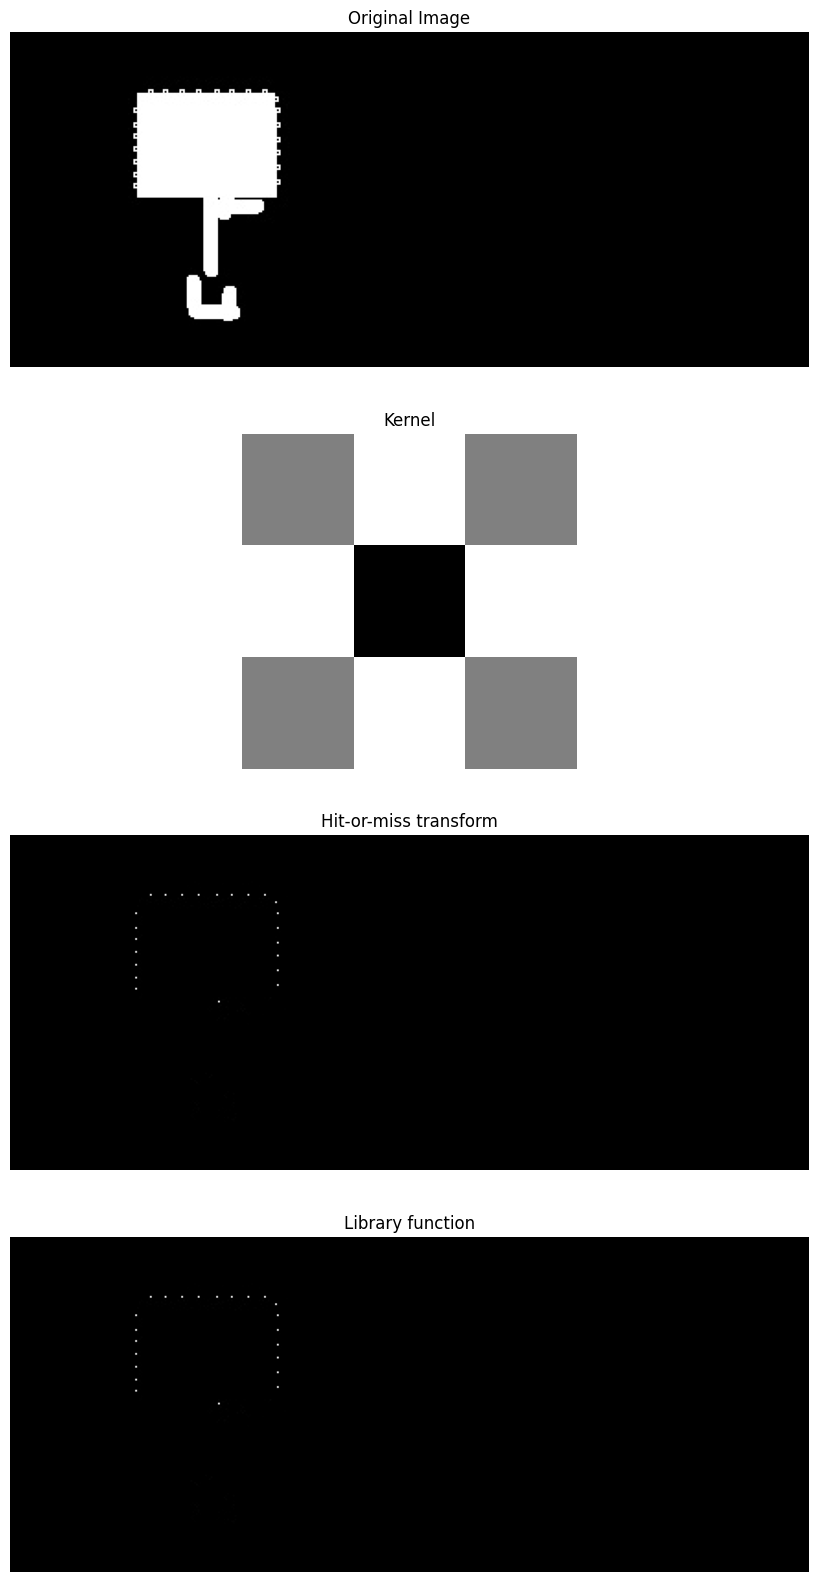

In [54]:
# SET FIGURE SIZE IN INCHES, ADJUSTING THE DISPLAYED WIDGHT AND THE HEIGHT

figura = plt.figure(figsize=(20, 20))

# DEFINING THE DISPLAY FORM WITH FOUR IMAGES SIDE BY SIDE

linhas = 4
colunas = 1

# CREATING THE FIRST SUBPLOT TO BE DISPLAYED

figura.add_subplot(linhas, colunas, 1)  # SUBPLOT POSITION
# Defines the data that will be displayed as an image, and in this case, a monochrome image due to cmap='gray'
plt.imshow(imagem, cmap = 'gray')
# Desables values displayed on numerics axes
plt.axis('off')
plt.title("Original Image") # Image Title

# CREATING THE SECOND SUBPLOT TO BE DISPLAYED IN THE SAME WAY AS THE PREVIOUS

figura.add_subplot(linhas, colunas, 2)
plt.imshow(kernel, cmap = 'gray')
plt.axis('off')
plt.title("Kernel")

# CREATING THE THIRD SUBPLOT TO BE DISPLAYED IN THE SAME WAY AS THE PREVIOUS

figura.add_subplot(linhas, colunas, 3)
plt.imshow(imagemfinal, cmap = 'gray')
plt.axis('off')
plt.title("Hit-or-miss transform")

# CREATING THE FOURTH SUBPLOT TO BE DISPLAYED IN THE SAME WAY AS THE PREVIOUS

figura.add_subplot(linhas, colunas, 4)
plt.imshow(hit_or_miss_biblioteca, cmap = 'gray')
plt.axis('off')
plt.title("Library function")

# SUBPLOTS DISPLAY

plt.show()